In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# Colab 내 한글 사용
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
# 데이터 불러오기
import pandas as pd

df_comment = pd.read_csv('/content/소비더머니_스타벅스문화_댓글.csv')

In [ ]:
df_comment

,comment,author,date,like
0,카페가 잘되는게 이젠 카페가 현대인의 거실이 된 영향도 한 몫하지 않나 싶어요. 밖...,@honestlie8928,2020-05-31T10:13:20Z,6614
1,옛날에는 스벅 비쌌는데 다른데가 다비싸지면서 평준화됨 ㅋㅋ,@qjas12,2020-05-31T09:37:05Z,10604
2,홍대나 강남가먄 개인카페 커피 7000원넘게함.. 근데 오래앉아있기 눈치보임. 차라...,@Soorstory,2020-09-30T02:28:08Z,1815
3,옛날에는 스벅이 되게 비싼 약간 사치의 아이콘처럼 비춰졌는데 요즘 개인카페들도 보면...,@kkrrhhrrk,2020-09-02T07:30:48Z,3572
4,근데 카페 많이 가본 사람들이면 다 알텐데 개인카페든 다른 프렌차이즈든 웬만하면 스...,@gurumkim2430,2020-05-31T08:41:13Z,2639
...,...,...,...,...
1108,미개,@user-cibal.,2021-04-25T07:35:21Z,0
1109,갑질.호구,@user-rs4zy7js6q,2022-05-16T08:15:41Z,0
1110,입이 한쪽으로 돌아갔네?,@user-gb6mn7gt4g,2022-03-24T07:41:08Z,0
1111,아무것도 모르면서 아는 척 쥰내하네....나무위키보고 긁어왔나,@user-fj9dx7kv1q,2022-03-08T15:00:37Z,0


# 데이터 전처리

## 정규표현식

> **정규표현식**

정규 표현식(Regular Expression)은 텍스트에서 특정한 패턴을 찾거나 매칭시키기 위해 사용되는 문자열의 패턴을 기술하는 도구입니다.

파이썬에서는 `re` 모듈을 통해 정규 표현식을 사용할 수 있습니다.


[점프 투 파이썬 8장 정규표현식](https://wikidocs.net/4308) 참고

### 기본 문법

1. **문자 클래스(Character Classes)**:
   - `[ ]`: 문자 클래스를 나타냅니다. 대괄호 안에 있는 문자 중 하나와 매칭됩니다.
   - `^`: 대괄호 안에서 사용되면 부정을 나타냅니다. 즉, 해당 문자 이외의 문자와 매칭됩니다.
   - `-`: 범위를 지정합니다. 예를 들어, `[a-z]`는 소문자 알파벳을 의미합니다.

2. **메타 문자(Meta Characters)**:
   - `.`: 어떤 한 개의 문자와 매칭됩니다. 단, 줄바꿈 문자 `\n`은 제외됩니다.
   - `^`: 문자열의 시작과 매칭됩니다.
   - `$`: 문자열의 끝과 매칭됩니다.
   - `*`: 앞에 오는 문자가 0번 이상 반복됨을 나타냅니다.
   - `+`: 앞에 오는 문자가 1번 이상 반복됨을 나타냅니다.
   - `?`: 앞에 오는 문자가 0번 또는 1번 등장함을 나타냅니다.
   - `{ }`: 반복 횟수를 명시합니다. `{3}`은 정확히 3번, `{3,}`은 3번 이상 등입니다.
   - `|`: 둘 중 하나를 선택함을 나타냅니다.
   - `( )`: 그룹을 나타냅니다. 그룹화된 패턴을 추출하거나 묶을 때 사용됩니다.
   - `\`: 이스케이프 문자로 사용됩니다. 예를 들어, `\d`는 숫자를 의미합니다.

3. **특수 시퀀스(Special Sequences)**:
   - `\d`: 숫자와 매칭됩니다.
   - `\D`: 숫자가 아닌 문자와 매칭됩니다.
   - `\s`: 공백 문자와 매칭됩니다.
   - `\S`: 공백 문자가 아닌 문자와 매칭됩니다.
   - `\w`: 알파벳 문자와 숫자, 밑줄 문자와 매칭됩니다.
   - `\W`: 알파벳 문자와 숫자, 밑줄 문자가 아닌 문자와 매칭됩니다.

`re` 모듈은 파이썬에서 정규 표현식(Regular Expression)을 처리하기 위한 내장 모듈입니다.

이 모듈을 사용하면 문자열에서 특정한 패턴을 찾거나 매칭시킬 수 있습니다.

`re` 모듈은 다양한 메서드를 제공하여 정규 표현식을 사용한 문자열 처리를 수행할 수 있습니다.

### re 모듈 주요 메서드

1. **`re.compile(pattern, flags=0)`**:
   - 정규 표현식 패턴을 컴파일하여 정규 표현식 객체를 생성합니다.
   - `pattern`: 컴파일할 정규 표현식 패턴입니다.
   - `flags`: 옵션 플래그입니다.

2. **`re.search(pattern, string, flags=0)`**:
   - 문자열 전체에서 정규 표현식 패턴과 매치되는 첫 번째 위치를 찾습니다.
   - `pattern`: 찾고자 하는 정규 표현식 패턴입니다.
   - `string`: 검색 대상이 되는 문자열입니다.
   - `flags`: 옵션 플래그입니다.

3. **`re.match(pattern, string, flags=0)`**:
   - 문자열의 처음부터 정규 표현식 패턴과 매치되는지 검사합니다.
   - `pattern`: 매치하고자 하는 정규 표현식 패턴입니다.
   - `string`: 검사 대상이 되는 문자열입니다.
   - `flags`: 옵션 플래그입니다.

4. **`re.findall(pattern, string, flags=0)`**:
   - 문자열에서 정규 표현식 패턴과 매치되는 모든 부분 문자열을 찾아 리스트로 반환합니다.
   - `pattern`: 찾고자 하는 정규 표현식 패턴입니다.
   - `string`: 검색 대상이 되는 문자열입니다.
   - `flags`: 옵션 플래그입니다.

5. **`re.sub(pattern, repl, string, count=0, flags=0)`**:
   - 정규 표현식 패턴과 일치하는 부분을 다른 문자열로 대체합니다.
   - `pattern`: 대체하고자 하는 정규 표현식 패턴입니다.
   - `repl`: 대체할 문자열입니다.
   - `string`: 대체를 수행할 문자열입니다.
   - `count`: 대체할 횟수를 지정할 수 있습니다.
   - `flags`: 옵션 플래그입니다.

### 예시

```python
import re

# re.search() 메서드 예시
text = "Python is fun!"
pattern = r"is"
result = re.search(pattern, text)
print(result.group())  # 출력: is

# re.findall() 메서드 예시
text = "The cat in the hat"
pattern = r"\b\w{3}\b"  # 세 글자 단어 찾기
result = re.findall(pattern, text)
print(result)  # 출력: ['The', 'cat', 'the', 'hat']

# re.sub() 메서드 예시
text = "Hello, World!"
pattern = r"World"
replacement = "Python"
result = re.sub(pattern, replacement, text)
print(result)  # 출력: Hello, Python!
```

이와 같이 `re` 모듈을 사용하여 정규 표현식을 처리하면, 문자열에서 특정한 패턴을 찾거나 대체할 수 있습니다. `re` 모듈은 문자열 처리와 데이터 추출에 매우 유용한 도구입니다.

### 정규표현식 활용 리뷰 데이터 전처리

In [ ]:
df_comment['comment'] = df_comment['comment'].str.replace('[^가-힣]', ' ', regex = True)
df_comment['comment']

0       카페가 잘되는게 이젠 카페가 현대인의 거실이 된 영향도 한 몫하지 않나 싶어요  밖...
1                        옛날에는 스벅 비쌌는데 다른데가 다비싸지면서 평준화됨   
2       홍대나 강남가먄 개인카페 커피     원넘게함   근데 오래앉아있기 눈치보임  차라...
3       옛날에는 스벅이 되게 비싼 약간 사치의 아이콘처럼 비춰졌는데 요즘 개인카페들도 보면...
4       근데 카페 많이 가본 사람들이면 다 알텐데 개인카페든 다른 프렌차이즈든 웬만하면 스...
                              ...                        
1108                                                   미개
1109                                                갑질 호구
1110                                        입이 한쪽으로 돌아갔네 
1111                   아무것도 모르면서 아는 척 쥰내하네    나무위키보고 긁어왔나
1112                       요점이 뭐니      혼자 흥분해서       안 봐 
Name: comment, Length: 1113, dtype: object

## 형태소 분석기

### 기본 설명

> **형태소 분석기**

- 형태소 분석기는 자연어 처리에서 사용되는 도구로, 주어진 문장이나 문서를 형태소라 불리는 최소 의미 단위로 분할하고, 각 형태소의 품사를 태깅하는 작업을 수행합니다.
- 형태소란 언어학에서 의미를 가지는 가장 작은 단위를 말하며, 한국어에서는 자음, 모음 또는 형태소가 될 수 있습니다.

        예를 들어, "나는 학교에 간다"라는 문장을 형태소 분석기가 처리하면 다음과 같은 결과를 얻을 수 있습니다:

        - "나"는 대명사이며, "는"은 조사입니다.
        - "학교"는 명사이며, "에"는 조사입니다.
        - "가"는 동사이며, "ㄴ다"는 어미입니다.

- 이렇게 형태소 분석기를 사용하면 텍스트 데이터를 의미 단위로 분할하고 각 단어의 문법적 역할을 파악할 수 있어, 자연어 처리 과정에서 중요한 전처리 단계로 활용됩니다.
- 형태소 분석 결과를 바탕으로 텍스트의 구조를 이해하고 정보 추출, 감정 분석, 기계 번역, 질문 응답 등 다양한 자연어 처리 작업을 수행할 수 있습니다.


> **KoNLPy**

- KoNLPy(코엔엘파이)는 한국어 자연어 처리를 위한 파이썬 라이브러리입니다.
- KoNLPy를 이용하면 다양한 형태소 분석기들을 동일한 방식으로 사용할 수 있어, 사용자는 선택한 분석기에 따라서 코드를 변경하지 않고도 자연어 처리 작업을 수행할 수 있습니다.
- KoNLPy를 통해 한국어 텍스트 데이터를 형태소 단위로 분석하고, 품사 태깅하여 다양한 자연어 처리 작업을 수행할 수 있습니다.

- KoNLPy는 다음과 같은 주요한 한국어 형태소 분석기들을 지원합니다:

    1. **Kkma (꼬꼬마)**: 서울대학교 IDS(Intelligent Data Systems) 연구실에서 개발한 형태소 분석기입니다. 문장 분석, 구(phrase) 분석, 형태소 분석, 품사 태깅 등 다양한 기능을 제공합니다.

    2. **Komoran (코모란)**: Shineware에서 개발한 형태소 분석기로, 속도가 빠르고 메모리 사용량이 적습니다. 대용량 텍스트 데이터 처리에 적합합니다.

    3. **Hannanum (한나눔)**: KAIST 인공지능연구실에서 개발한 형태소 분석기입니다. 전통적인 한국어 분석 방식을 따르며, 다양한 문법적 요소를 처리합니다.

    4. **Twitter (트위터)**: 트위터에서 개발한 형태소 분석기로, 속도가 빠르고 정확한 품사 판별 능력을 가지고 있습니다. 주로 소셜 미디어 데이터나 SNS 데이터 처리에 사용됩니다.



### 형태소 분석기 활용 리뷰 데이터 전처리

In [ ]:
!pip install konlpy

In [ ]:
import konlpy

#형태소 분석기 꼬꼬마(Kkma) 사용
kkma = konlpy.tag.Kkma()

In [ ]:
# 명사 추출
nouns = df_comment['comment'].apply(kkma.nouns)

In [ ]:
nouns

0       [카페, 이젠, 현대인, 거실, 영향, 몫, 밖, 누군가, 때, 공간, 필요, 필요...
1                                     [옛날, 스벅, 데, 면, 평준화]
2       [홍, 홍대나, 대나, 강, 강남가먄, 남가, 먄, 개인, 개인카페, 카페, 커피,...
3       [옛날, 스벅, 약간, 사치, 아이콘, 요즘, 개인, 개인카페, 카페, 뭐, 인, ...
4       [카페, 가본, 사람, 터, 개인, 개인카페, 프렌, 프렌차이즈, 차, 이즈, 스벅...
                              ...                        
1108                                                 [미개]
1109                                              [갑, 호구]
1110                                             [입이, 한쪽]
1111                   [아무것, 척, 쥰, 쥰내하, 내하, 나무위, 나무위키, 키]
1112                                   [요점, 뭐, 니, 혼자, 흥분]
Name: comment, Length: 1113, dtype: object

In [ ]:
df_comment['comment']

0       카페가 잘되는게 이젠 카페가 현대인의 거실이 된 영향도 한 몫하지 않나 싶어요  밖...
1                        옛날에는 스벅 비쌌는데 다른데가 다비싸지면서 평준화됨   
2       홍대나 강남가먄 개인카페 커피     원넘게함   근데 오래앉아있기 눈치보임  차라...
3       옛날에는 스벅이 되게 비싼 약간 사치의 아이콘처럼 비춰졌는데 요즘 개인카페들도 보면...
4       근데 카페 많이 가본 사람들이면 다 알텐데 개인카페든 다른 프렌차이즈든 웬만하면 스...
                              ...                        
1108                                                   미개
1109                                                갑질 호구
1110                                        입이 한쪽으로 돌아갔네 
1111                   아무것도 모르면서 아는 척 쥰내하네    나무위키보고 긁어왔나
1112                       요점이 뭐니      혼자 흥분해서       안 봐 
Name: comment, Length: 1113, dtype: object

In [ ]:
# explode 메서드로 한 단어가 한 행에 들어가도록 전처리
nouns_explode = nouns.explode()
nouns_explode

0        카페
0        이젠
0       현대인
0        거실
0        영향
       ... 
1112     요점
1112      뭐
1112      니
1112     혼자
1112     흥분
Name: comment, Length: 14209, dtype: object

In [ ]:
# 글자 길이가 2 이상인 명사만 추출
df_word = pd.DataFrame({'word' : nouns_explode})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
0,카페,2.0
0,이젠,2.0
0,현대인,3.0
0,거실,2.0
0,영향,2.0
...,...,...
1111,나무위,3.0
1111,나무위키,4.0
1112,요점,2.0
1112,혼자,2.0


In [ ]:
df_word

,word,count
0,카페,2.0
0,이젠,2.0
0,현대인,3.0
0,거실,2.0
0,영향,2.0
...,...,...
1111,나무위,3.0
1111,나무위키,4.0
1112,요점,2.0
1112,혼자,2.0


In [ ]:
# value_counts 로 빈도수 파악
df_word['word'].value_counts()

스벅      401
커피      369
스타벅스    189
스타      140
카페      132
       ... 
뒷부분       1
팩트        1
팔면        1
오션뷰       1
요점        1
Name: word, Length: 3886, dtype: int64

In [ ]:
# groupby 로 단어별 빈도수 데이터프레임 생성
df_word_count = df_word.groupby(['word'], as_index=False).count().sort_values(ascending=False, by='count')

In [ ]:
df_word_count

,word,count
1814,스벅,401
3364,커피,369
1883,스타벅스,189
1880,스타,140
3337,카페,132
...,...,...
1681,세계최대,1
1682,세권,1
1684,세기,1
1686,세도,1


In [ ]:
df_word_count.head(10)

,word,count
1814,스벅,401
3364,커피,369
1883,스타벅스,189
1880,스타,140
3337,카페,132
3697,한국,123
1306,벅스,121
1513,사람,104
1,가격,90
513,나라,74


In [ ]:
df_word_count['count'].value_counts()

1      2719
2       488
3       194
4       113
5        74
6        54
7        46
8        32
9        19
10       19
11       16
13       10
17        7
20        7
14        7
12        7
15        6
19        5
21        5
22        4
18        3
39        3
23        3
24        3
29        3
16        2
27        2
26        2
28        2
30        2
31        2
32        2
42        2
46        2
369       1
73        1
189       1
140       1
132       1
123       1
121       1
104       1
90        1
74        1
54        1
70        1
67        1
25        1
45        1
44        1
41        1
38        1
37        1
34        1
401       1
Name: count, dtype: int64

In [ ]:
# 스벅, 스타, 스타벅스, 벅스 제외
starbucks_idx = df_word_count[~df_word_count['word'].apply(lambda x: re.match('[스벅|스타|스타벅스|벅스]', x)).isna()].index.tolist()
df_word_count.drop(starbucks_idx, axis=0, inplace=True)

# 5번 미만 등장한 단어 제외
low_count_index = df_word_count[df_word_count['count']<5].index.tolist()
df_word_count.drop(low_count_index, axis=0, inplace=True)

In [ ]:
df_word_count

,word,count
3364,커피,369
3337,카페,132
3697,한국,123
1513,사람,104
1,가격,90
...,...,...
141,거임,5
63,감성,5
337,관심,5
261,골드,5


<Axes: xlabel='word'>

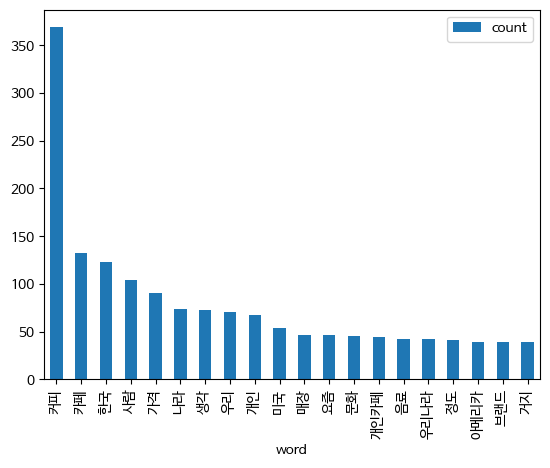

In [ ]:
df_word_count.reset_index(drop=True).iloc[:20].plot.bar(x='word')

# 데이터 시각화

## 워드클라우드

> **워드클라우드**

- 워드클라우드(Word Cloud)는 텍스트 데이터에서 많이 등장하는 단어들을 시각적으로 나타내는 방법 중 하나입니다.
- 이는 단어의 빈도수를 기반으로 하여, 빈도수가 높은 단어일수록 크게 표시하고, 빈도수가 낮은 단어일수록 작게 표시하여 단어의 상대적인 중요도를 시각적으로 나타냅니다.
- 주로 텍스트 데이터의 특징을 한눈에 파악하고 시각적으로 표현할 때 사용됩니다.
- 예를 들어, 특정 주제에 관한 뉴스 기사나 소셜 미디어 게시글에서 가장 많이 언급되는 단어들을 확인하거나, 사용자의 텍스트 데이터에서 주요 주제나 키워드를 파악할 때 활용됩니다.

In [ ]:
word_dict = df_word_count.set_index('word').to_dict()['count']
word_dict

{'커피': 369,
 '카페': 132,
 '한국': 123,
 '사람': 104,
 '가격': 90,
 '나라': 74,
 '생각': 73,
 '우리': 70,
 '개인': 67,
 '미국': 54,
 '매장': 46,
 '요즘': 46,
 '문화': 45,
 '개인카페': 44,
 '음료': 42,
 '우리나라': 42,
 '정도': 41,
 '아메리카': 39,
 '브랜드': 39,
 '거지': 39,
 '이유': 38,
 '서비스': 37,
 '아메리카노': 34,
 '있음': 32,
 '원두': 32,
 '이벤트': 31,
 '직원': 31,
 '이상': 30,
 '하나': 30,
 '지금': 29,
 '프리': 29,
 '시간': 29,
 '때문': 28,
 '느낌': 28,
 '사이렌': 27,
 '천원': 27,
 '이해': 26,
 '영상': 26,
 '공간': 25,
 '커피값': 24,
 '소비': 24,
 '쿠폰': 24,
 '한국인': 23,
 '동네': 23,
 '오더': 23,
 '예전': 22,
 '눈치': 22,
 '일본': 22,
 '친절': 22,
 '텀블러': 21,
 '이것': 21,
 '포켓': 21,
 '아웃': 21,
 '가게': 21,
 '테이크': 20,
 '커피맛': 20,
 '메뉴': 20,
 '한잔': 20,
 '내가': 20,
 '프리퀀시': 20,
 '주고': 20,
 '거기': 19,
 '만원': 19,
 '안감': 19,
 '이제': 19,
 '공부': 19,
 '무엇': 18,
 '설명': 18,
 '옛날': 18,
 '할인': 17,
 '이즈': 17,
 '회사': 17,
 '이용': 17,
 '한번': 17,
 '분위기': 17,
 '인테리어': 16,
 '사이즈': 16,
 '테이크아웃': 15,
 '결국': 15,
 '수준': 15,
 '자리': 15,
 '그것': 15,
 '차이': 15,
 '가능': 14,
 '대부분': 14,
 '다방': 14,
 '허세': 14,
 '하루': 14,


**[WordCloud for Python documentation](https://amueller.github.io/word_cloud/) 참고**

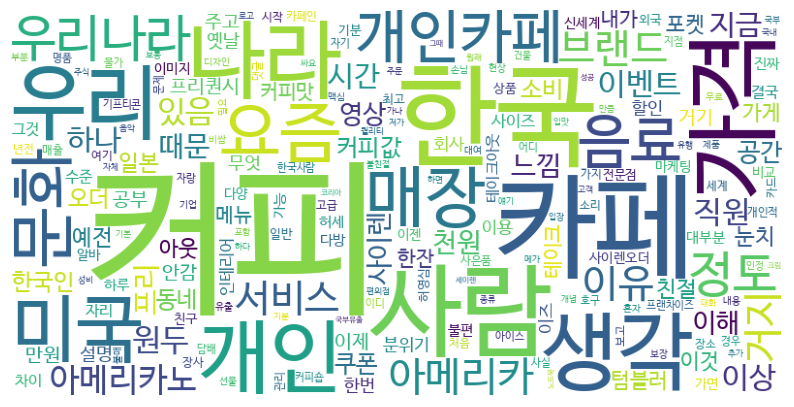

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    width = 800,
    height = 400,
    background_color = 'white',
    font_path = 'NanumBarunGothic',
)

img_wordcloud = wc.generate_from_frequencies(word_dict)

plt.figure(figsize = (10, 20)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기

## 시각화 BI 활용 대시보드 시각화 (Looker Studio)

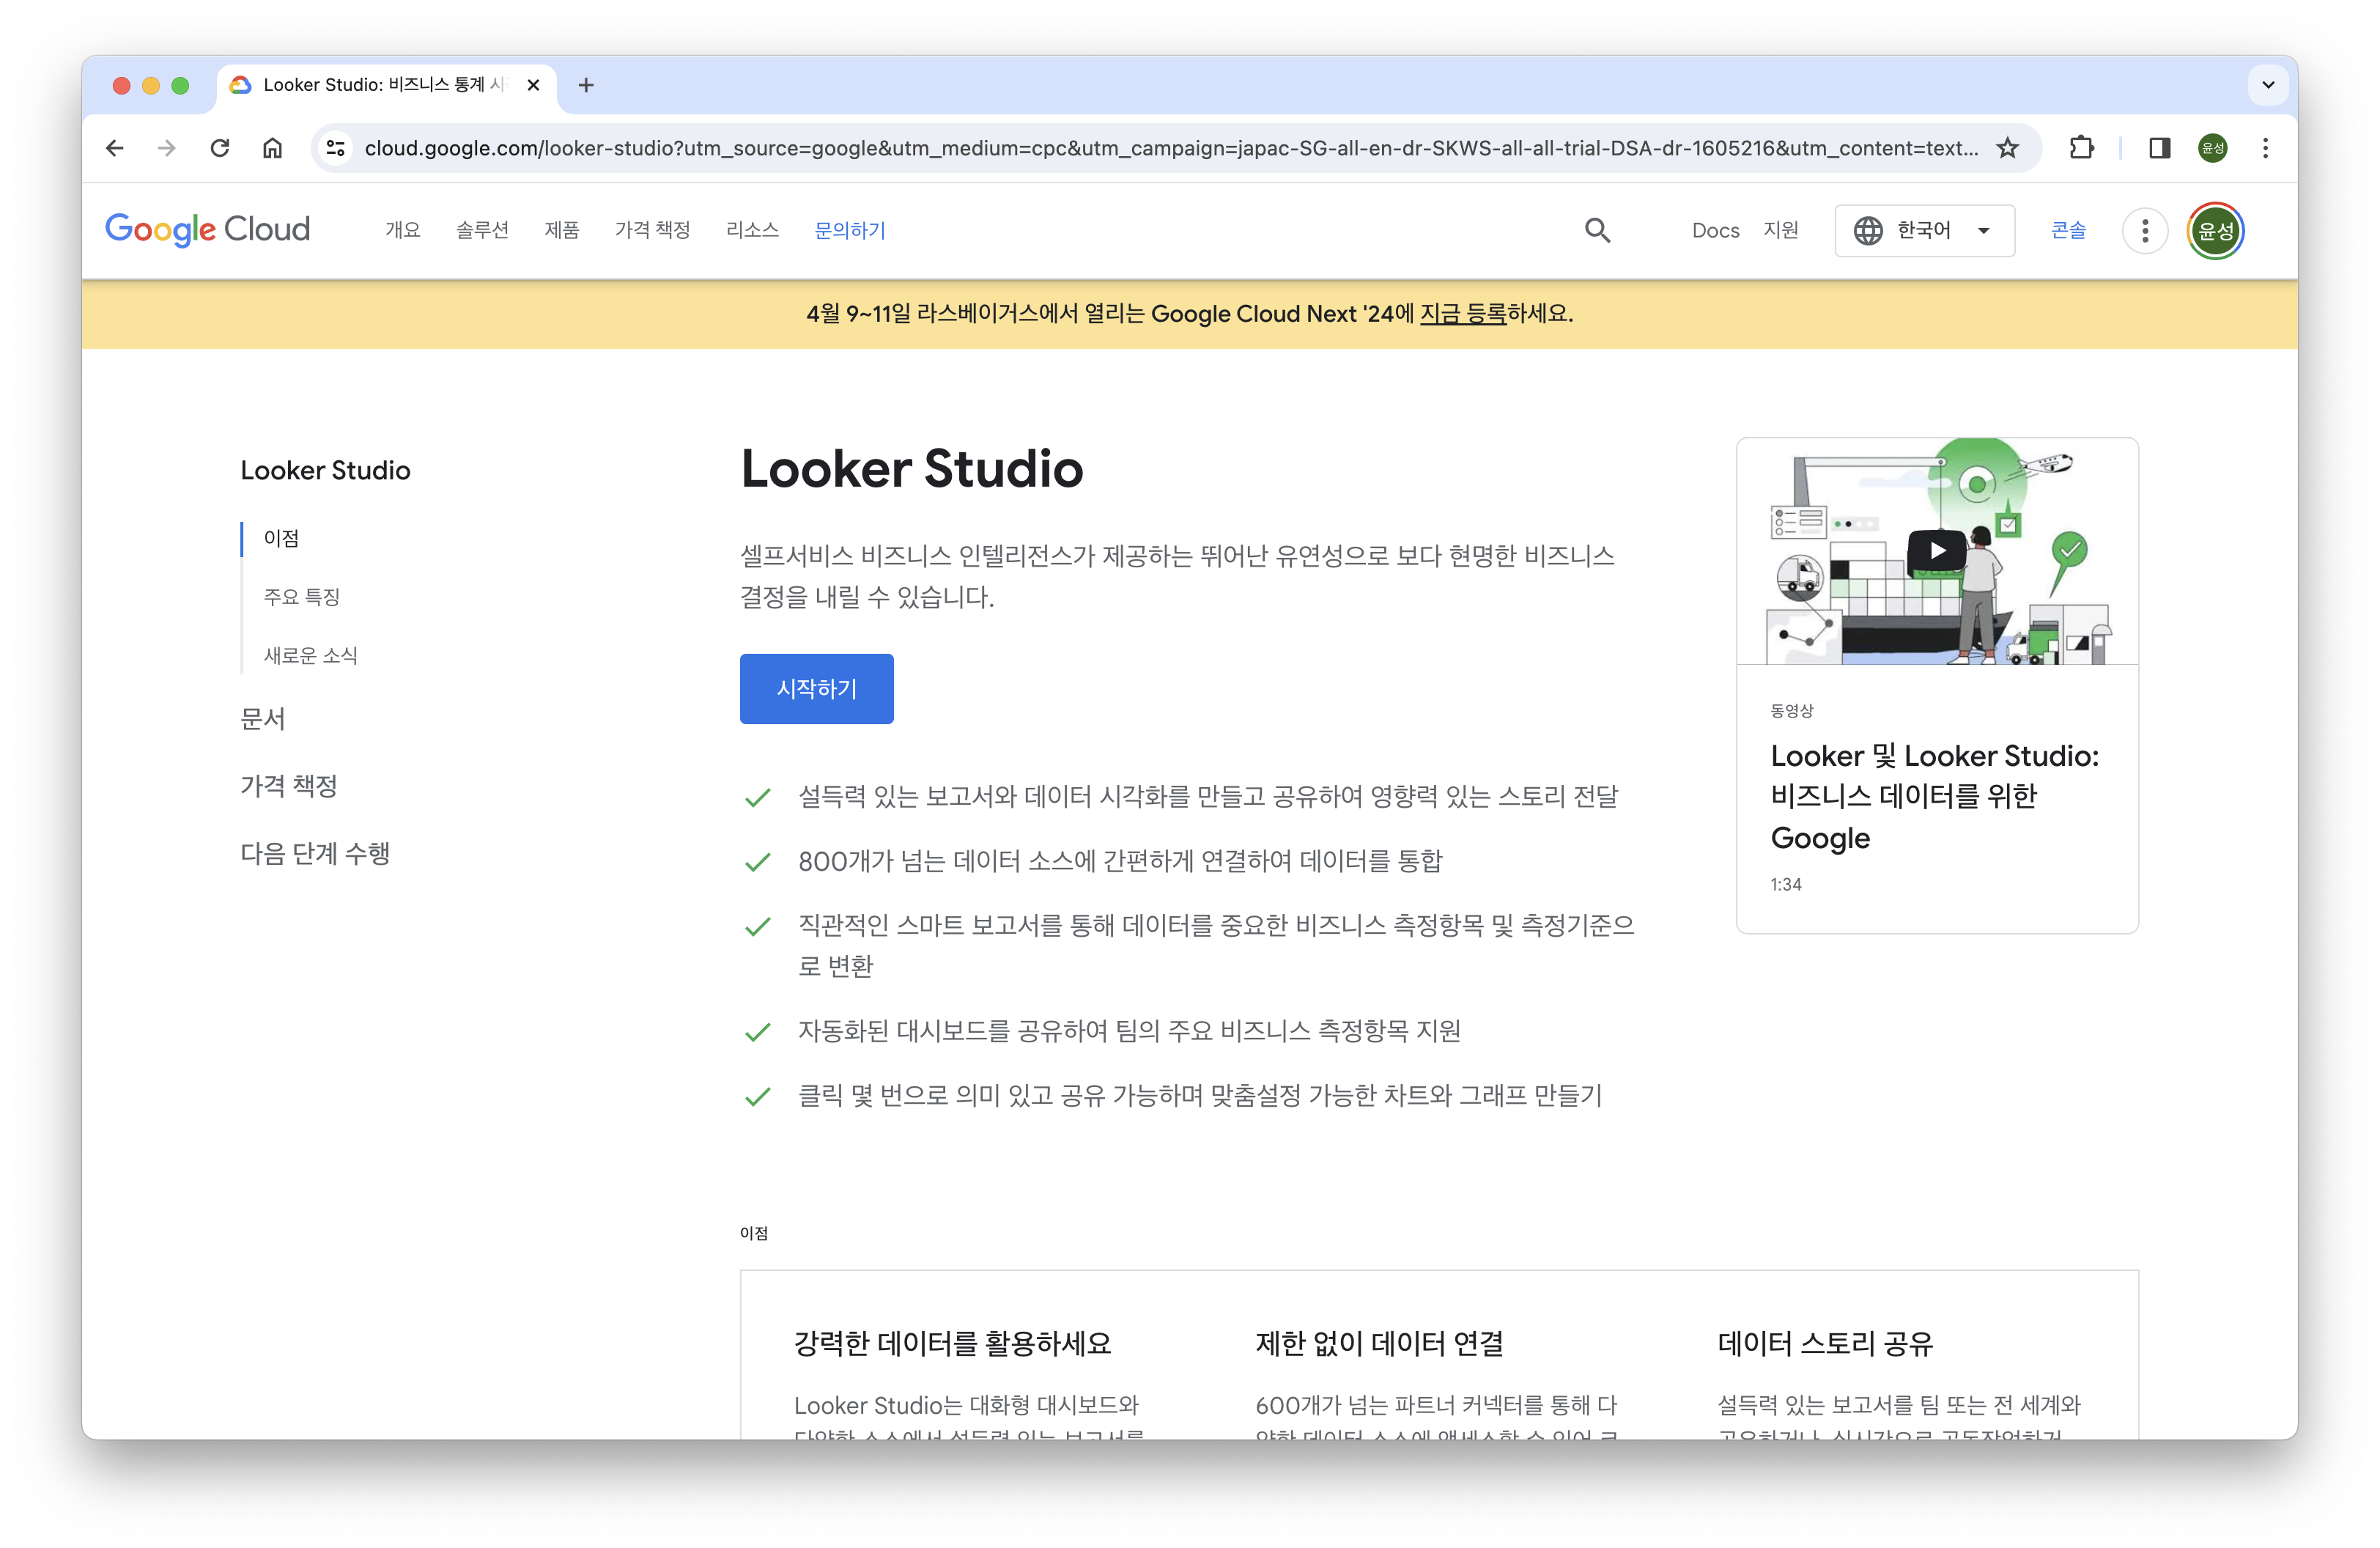

> **Looker Studio**


- Google 에서 지원하는 데이터 시각화 BI 툴
- 기존에는 데이터 스튜디오였지만 2022년 12월 루커 스튜디오로 변경
- 무료로 제공되며 다양한 구글 서비스와의 호환성이 높은 편
- [공식 문서](https://support.google.com/looker-studio/answer/6283323?hl=ko&ref_topic=6267740&sjid=17128466794701342446-AP)




**[소비더머니 KPI 대시보드](https://lookerstudio.google.com/reporting/d2ec5518-73e3-4700-905f-851087e6d281)**

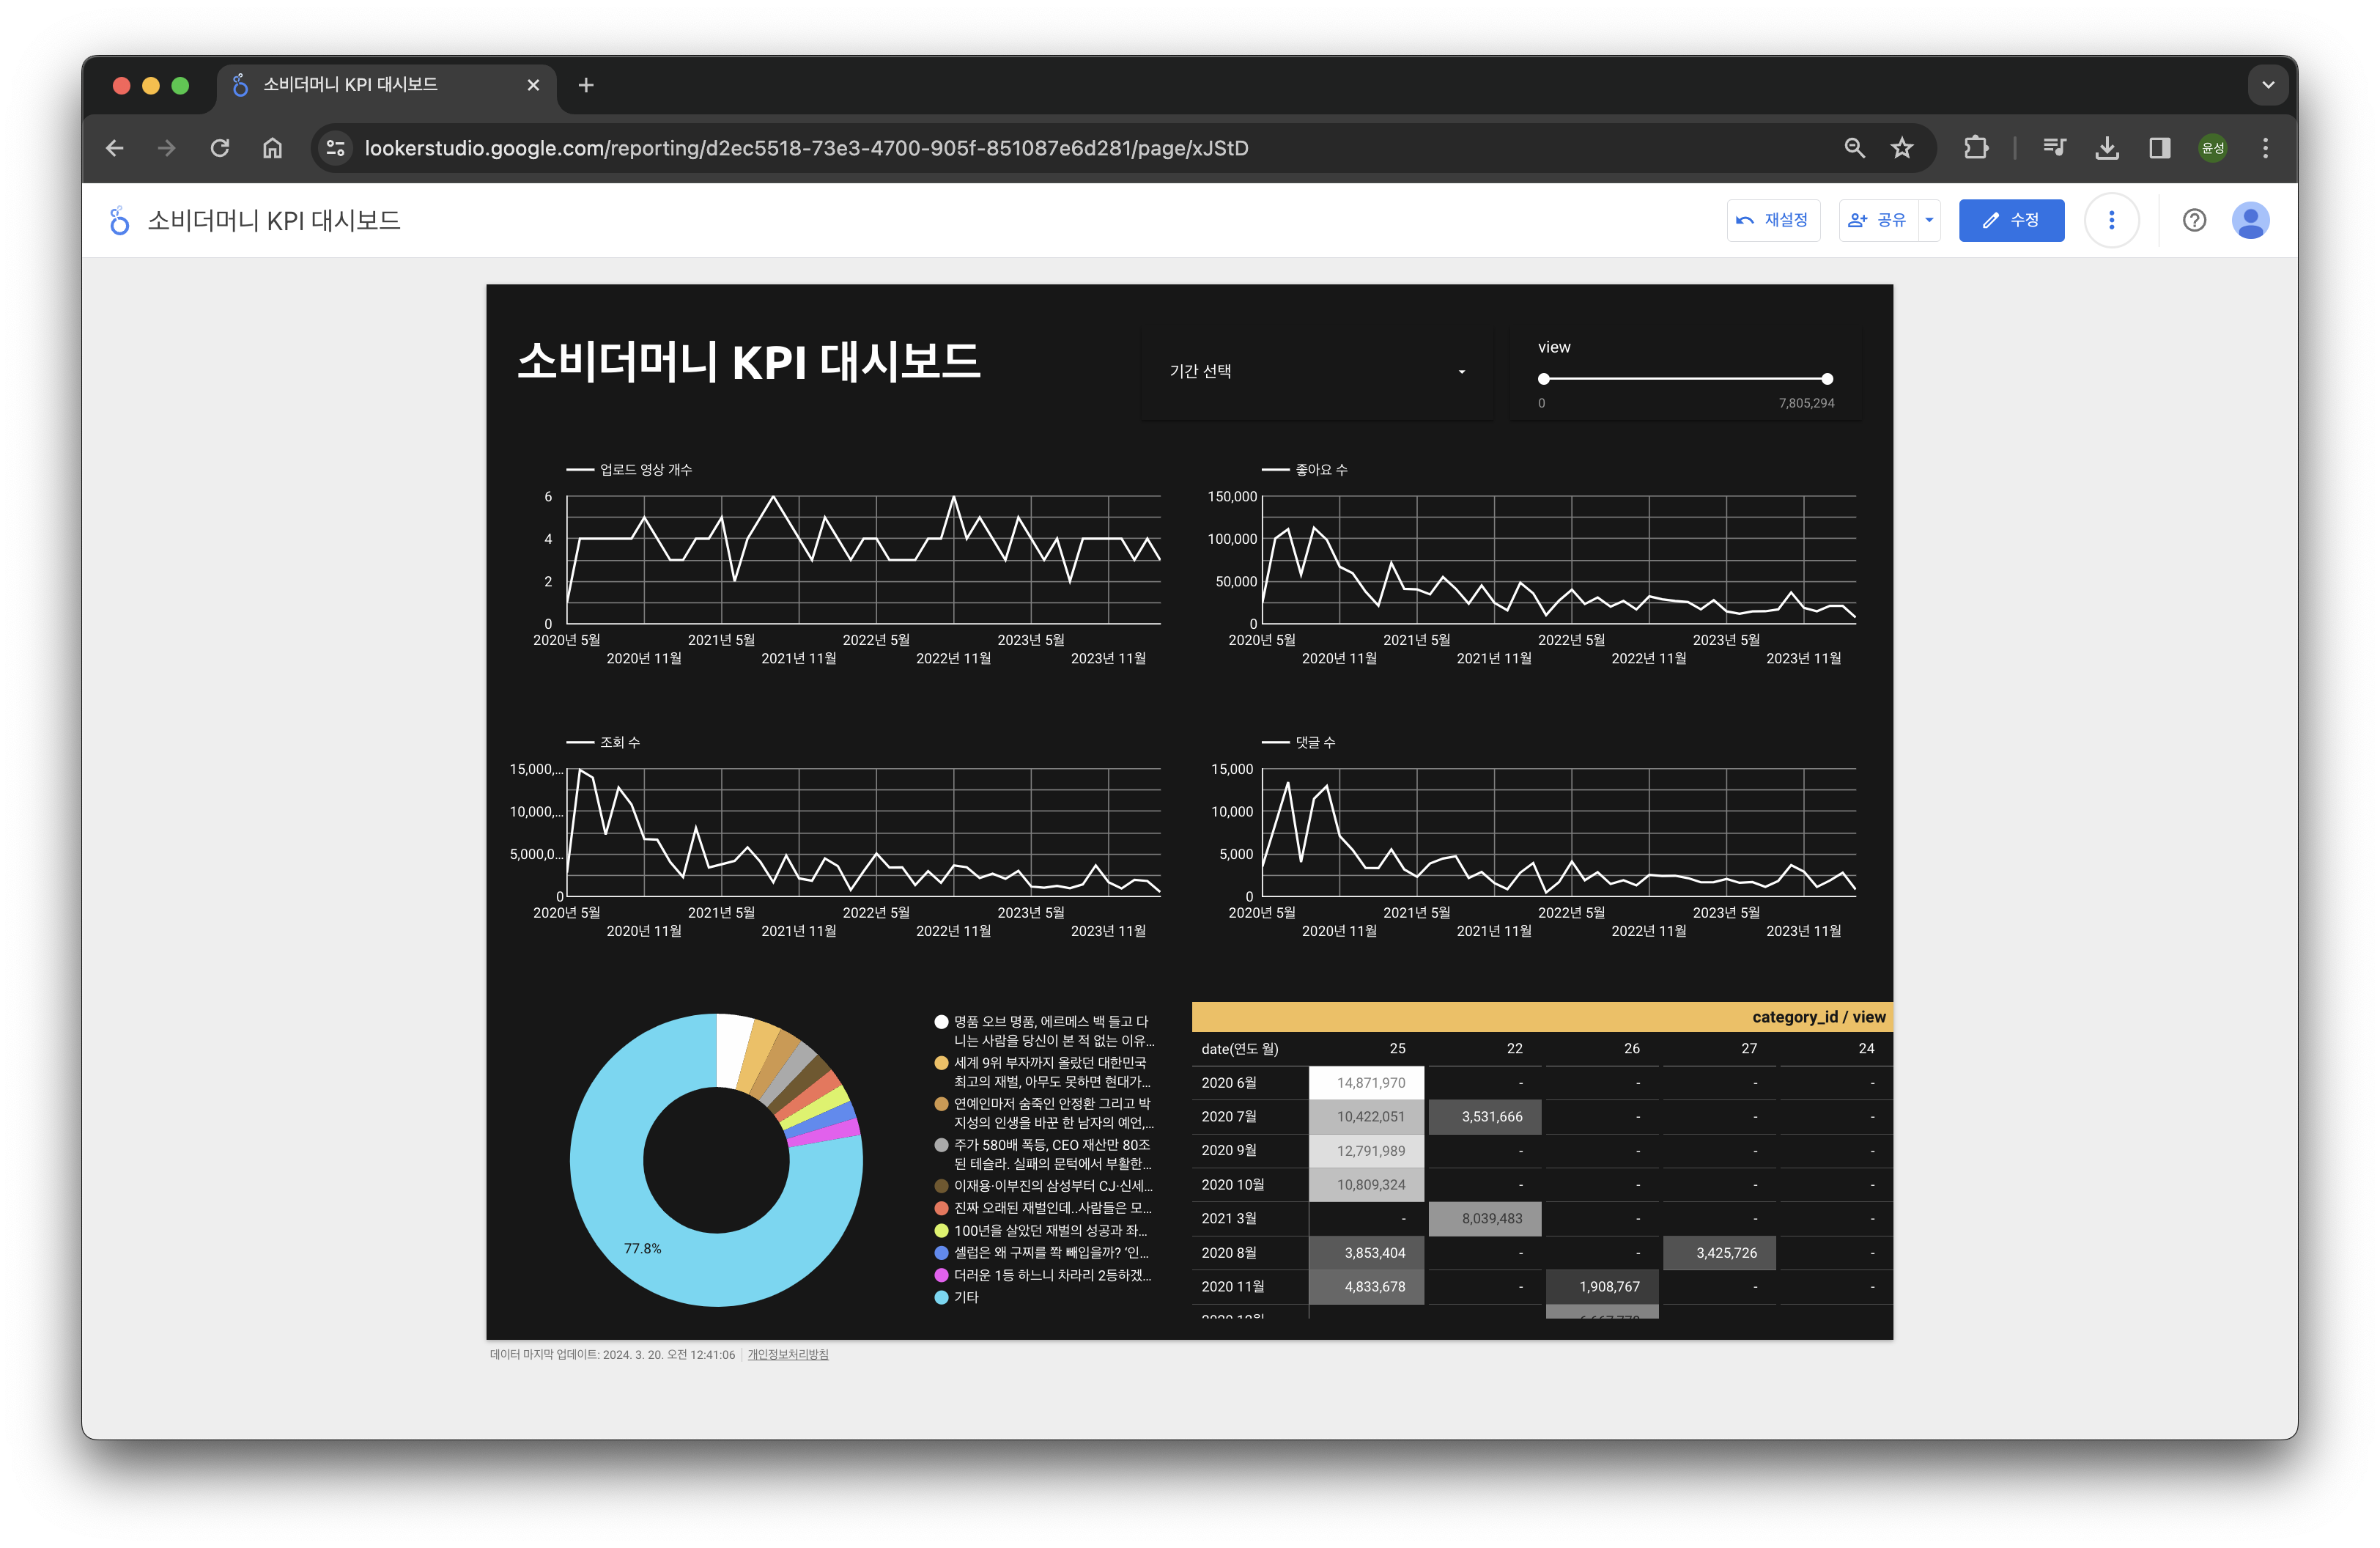